## Summary

----

## Imports

In [1]:
import os
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option("max_row", 1000)
pd.set_option("max_column", 1000)

## Parameters

In [3]:
NOTEBOOK_NAME = "16_david_analysis"
NOTEBOOK_PATH = Path(NOTEBOOK_NAME).resolve()
NOTEBOOK_PATH.mkdir(exist_ok=True)
NOTEBOOK_PATH

PosixPath('/home/kimlab1/strokach/workspace/proteinsolver/notebooks/16_david_analysis')

## Helper functions

In [4]:
def read_scores_total(file):
    columns = [
        "protein_name",
        "pdb_name",
        "molpdf",
        *[f"ga341_score_{i}" for i in range(8)],
        "dope_score",
        "dope_score_norm",
        "nope_hr_score",
    ]
    results = []
    with file.open("rt") as fin:
        for line in fin:
            protein_name, pdb_name, molpdf, ga341_score, dope_score, dope_score_norm, nope_hr_score = line.strip().split(
                ":"
            )
            results.append(
                (
                    protein_name,
                    pdb_name,
                    float(molpdf),
                    *eval(ga341_score),
                    float(dope_score),
                    float(dope_score_norm),
                    float(nope_hr_score),
                )
            )
    return pd.DataFrame(results, columns=columns)

## Workflow

Note from David:

> The way to read the file (i.e., scoresTotal) is:
> 
> protein_name + ':' + pdb_name + ':' + molpdf + ':' + 'GA341 score' + ':' + 'DOPE score' + ':' + 'Normalized DOPE score' + ':' + 'DOPE-HR score + '\n'
> 
> The measure that we used in the plots was molpdf, then you should read the third column.

In [5]:
!ls {NOTEBOOK_PATH}

molpdb-scores-1n5u.svg	molpdb-scores-4z8j.svg	   quark-aligned-4beuA02.png
molpdb-scores-4beu.svg	Quark			   Scores
molpdb-scores-4unu.svg	quark-aligned-1n5uA03.png  screenshot.png


In [6]:
!ls {NOTEBOOK_PATH}/Scores

1n5u	4beu	4unu	      4unuWT  4z8jFiltered  5vid    5vli    5vmr
1n5uWT	4beuWT	4unuFiltered  4z8j    4z8jWT	    5vidWT  5vliWT  5vmrWT


### Load model scores

In [7]:
SCORES = {}

PDB_IDS = ["1n5u", "4beu", "4unu", "4z8j", "5vid", "5vli", "5vmr"]

In [8]:
for pdb_id in PDB_IDS:
    print(pdb_id)

    SCORES[f"{pdb_id}_wt"] = read_scores_total(NOTEBOOK_PATH.joinpath("Scores", f"{pdb_id}WT", "scoresTotal"))
    assert len(SCORES[f"{pdb_id}_wt"]) == 1

    SCORES[f"{pdb_id}"] = read_scores_total(NOTEBOOK_PATH.joinpath("Scores", f"{pdb_id}", "scoresTotal"))

1n5u
4beu
4unu
4z8j
5vid
5vli
5vmr


### Generate plots

In [9]:
SCORES["1n5u"].head()

,protein_name,pdb_name,molpdf,ga341_score_0,ga341_score_1,ga341_score_2,ga341_score_3,ga341_score_4,ga341_score_5,ga341_score_6,ga341_score_7,dope_score,dope_score_norm,nope_hr_score
0,1n5u_11115,1n5u_11115.B99990001.pdb,331.188141,1.0,0.333770,-199.935623,-11.192048,-14.278540,-6.215987,-6.553811,-9.149229,-8536.583984,-2.325544,-7893.746094
1,1n5u_10104,1n5u_10104.B99990001.pdb,291.176971,1.0,0.335036,-216.271133,-11.589787,-14.527915,-7.145832,-6.461433,-8.887251,-8651.523438,-2.291999,-8350.359375
2,1n5u_11709,1n5u_11709.B99990001.pdb,321.634644,1.0,0.343180,-220.915268,-11.113292,-14.798443,-7.288752,-6.346551,-9.109745,-8701.623047,-2.355440,-8406.374023
3,1n5u_11569,1n5u_11569.B99990001.pdb,358.094788,1.0,0.331383,-193.088791,-11.931268,-14.321241,-6.849178,-6.600010,-8.736956,-8500.715820,-2.295815,-7982.669434
4,1n5u_10496,1n5u_10496.B99990001.pdb,320.189484,1.0,0.344019,-200.976791,-11.313426,-14.269778,-6.716456,-6.372287,-8.620751,-8604.061523,-2.389728,-8127.271973


In [11]:
cmap = plt.cm.get_cmap("Set1")

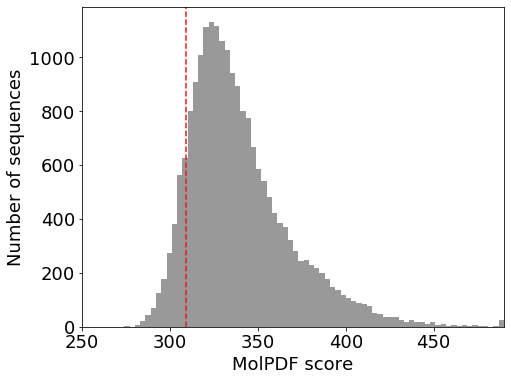

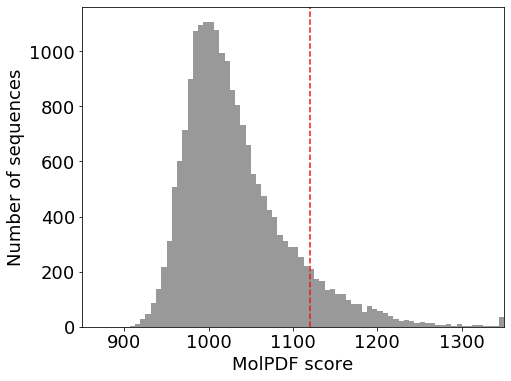

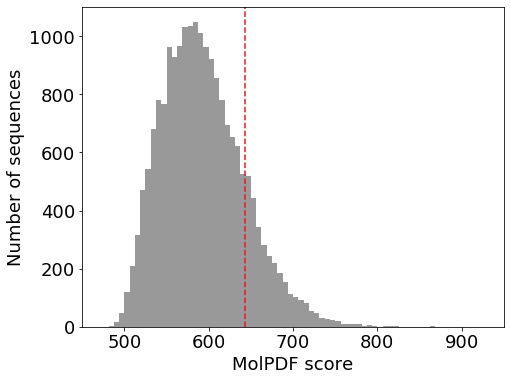

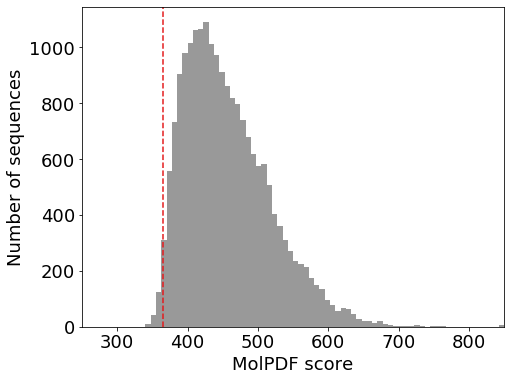

In [12]:
for pdb_id, *xlim in [
    #
    ("1n5u", 250, 490),
    ("4beu", 850, 1350),
    ("4unu", 450, 950),
    ("4z8j", 250, 850),
    #     ("5vid", 250, 1450),
    #     ("5vli", 250, 1450),
    #     ("5vmr", 250, 1450),
]:
    with plt.rc_context(rc={"font.size": 18}):
        fg, ax = plt.subplots(figsize=(8 * 0.9, 6 * 0.9))
        ax.hist(np.clip(SCORES[f"{pdb_id}"]["molpdf"].values, *xlim), bins=80, range=xlim, color=cmap(8))
        ylim = ax.get_ylim()
        ax.vlines(SCORES[f"{pdb_id}_wt"].iloc[0]["molpdf"], *ylim, colors="k", linestyle="--", color=cmap(0))
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
        ax.set_xlabel("MolPDF score")
        ax.set_ylabel("Number of sequences")
    fg.tight_layout()
    fg.savefig(NOTEBOOK_PATH.joinpath(f"molpdb-scores-{pdb_id}.svg"), bbox_inches="tight")